In [1]:
# Importing dependencies and API key
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import time #for plotting
from scipy.stats import linregress

# Citipy is a dependency we also use in our project work
from citipy import citipy

In [2]:
# Loan CSV file generated
airwater_data_csv = "./Clean_Data/CityCountryClimateWaterAir.csv"
airwater_data_df = pd.read_csv(airwater_data_csv)
# Dropping the Unnamed column
dropna_airwater_data_df = airwater_data_df.dropna()
del dropna_airwater_data_df["Unnamed: 0"]
airwater_data_df = dropna_airwater_data_df
#Displaying headers
airwater_data_df.head(20)





,city,climate,country,subcountry,geonameid,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,punta arenas,EF,Chile,Magallanes,3874787,"""Magellan and the Chilean Antarctic Region""","""Chile""",94.444444,45.000000
1,hermanus,EF,South Africa,Western Cape,3366880,"""Western Cape""","""South Africa""",100.000000,0.000000
2,port elizabeth,EF,South Africa,Eastern Cape,964420,"""Eastern Cape""","""South Africa""",80.263158,56.250000
3,east london,EF,South Africa,Eastern Cape,1006984,"""Eastern Cape""","""South Africa""",70.833333,58.333333
4,busselton,EF,Australia,Western Australia,2075265,"""Western Australia""","""Australia""",90.000000,50.000000
5,albany,EF,Australia,Western Australia,2077963,"""New York""","""United States of America""",87.500000,31.250000
6,albany,EF,Australia,Western Australia,2077963,"""Georgia""","""United States of America""",75.000000,16.666667
7,albany,EF,Australia,Western Australia,2077963,"""Oregon""","""United States of America""",75.000000,12.500000
8,albany,EF,Australia,Western Australia,2077963,"""Western Australia""","""Australia""",84.375000,31.250000
9,albany,EF,United States,Georgia,4179320,"""New York""","""United States of America""",87.500000,31.250000


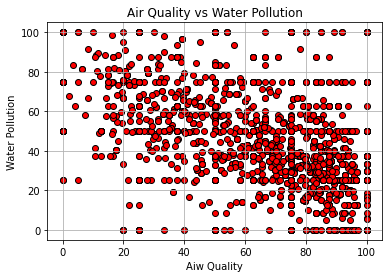

In [3]:
#set data to plot
x = airwater_data_df[" \"AirQuality\""]
y = airwater_data_df[" \"WaterPollution\""]
plt.scatter(x,y,edgecolors="black",facecolors="red")
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Air Quality vs Water Pollution")
plt.xlabel("Aiw Quality")
plt.ylabel("Water Pollution")
#export as png
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution.png')
#display plot!
plt.show()




In [4]:
# x_values: first set of data (always latitude)
# y_values: second set of data (temperature, humidity, cloudiness, wind speed)
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, edgecolors="black",facecolors="lightgreen")
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Air Quality')
    plt.ylabel(f'{y_label}')
    plt.grid()

The r-square is -0.44244217168031386
y = -0.36x + 67.61


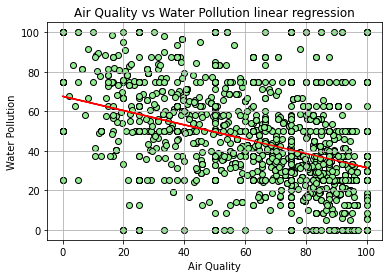

In [5]:
#Chart plotting
x_values = airwater_data_df[" \"AirQuality\""]
y_values = airwater_data_df[" \"WaterPollution\""]

regEQplotX = -25
regEQplotY = 40

y_label = "Water Pollution"
plt.title(f'Air Quality vs Water Pollution linear regression')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution Linear Regression.png')
plt.show()

#There is a slight correlation between air quality and water pollution - the lower the water pollution, the higher the air quality

In [10]:
# I created a subset of the dataset:
# To look at the correlation above if it's still valid for a smaller sample (using linear regression)

EF_airwater_data_df = airwater_data_df[airwater_data_df["climate"] == "EF"]
EF_airwater_data_df

,city,climate,country,subcountry,geonameid,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,punta arenas,EF,Chile,Magallanes,3874787,"""Magellan and the Chilean Antarctic Region""","""Chile""",94.444444,45.000000
1,hermanus,EF,South Africa,Western Cape,3366880,"""Western Cape""","""South Africa""",100.000000,0.000000
2,port elizabeth,EF,South Africa,Eastern Cape,964420,"""Eastern Cape""","""South Africa""",80.263158,56.250000
3,east london,EF,South Africa,Eastern Cape,1006984,"""Eastern Cape""","""South Africa""",70.833333,58.333333
4,busselton,EF,Australia,Western Australia,2075265,"""Western Australia""","""Australia""",90.000000,50.000000
5,albany,EF,Australia,Western Australia,2077963,"""New York""","""United States of America""",87.500000,31.250000
6,albany,EF,Australia,Western Australia,2077963,"""Georgia""","""United States of America""",75.000000,16.666667
7,albany,EF,Australia,Western Australia,2077963,"""Oregon""","""United States of America""",75.000000,12.500000
8,albany,EF,Australia,Western Australia,2077963,"""Western Australia""","""Australia""",84.375000,31.250000
9,albany,EF,United States,Georgia,4179320,"""New York""","""United States of America""",87.500000,31.250000


The r-square is 0.03573625797082677
y = 0.07x + 22.08


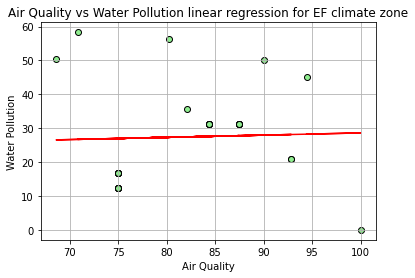

In [11]:
#Chart plotting
x_values = EF_airwater_data_df[" \"AirQuality\""]
y_values = EF_airwater_data_df[" \"WaterPollution\""]

regEQplotX = -25
regEQplotY = 40

y_label = "Water Pollution"
plt.title(f'Air Quality vs Water Pollution linear regression for EF climate zone')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution Linear Regression for EF climate zone.png')
plt.show()

#There is no correlation between air quality and water pollution for the EF region, so I decided to run a few more samples with few different regions

In [12]:
# Cfb climate zone

Cfb_airwater_data_df = airwater_data_df[airwater_data_df["climate"] == "Cfb"]
Cfb_airwater_data_df

,city,climate,country,subcountry,geonameid,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
32,milton,Cfb,Canada,Ontario,6074377,"""Ontario""","""Canada""",81.818182,29.545455
33,milton,Cfb,Canada,Ontario,6074377,"""Delaware""","""United States of America""",50.000000,100.000000
34,milton,Cfb,United States,Massachusetts,4944193,"""Ontario""","""Canada""",81.818182,29.545455
35,milton,Cfb,United States,Massachusetts,4944193,"""Delaware""","""United States of America""",50.000000,100.000000
36,milton,Cfb,United States,Georgia,6331908,"""Ontario""","""Canada""",81.818182,29.545455
...,...,...,...,...,...,...,...,...,...
2173,gdynia,Cfb,Poland,Pomeranian Voivodeship,3099424,"""Pomeranian Voivodeship""","""Poland""",49.418605,48.611111
2180,kretinga,Cfb,Lithuania,Klaipedos apskritis,597989,"""""","""Lithuania""",75.000000,50.000000
2183,kalmar,Cfb,Sweden,Kalmar,2702261,"""Kalmar County""","""Sweden""",100.000000,50.000000
2189,visby,Cfb,Sweden,Gotland,2662689,"""Gotland County""","""Sweden""",75.000000,0.000000


The r-square is -0.5194650902295948
y = -0.48x + 71.06


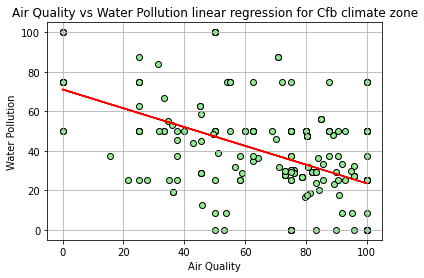

In [13]:
#Chart plotting
x_values = Cfb_airwater_data_df[" \"AirQuality\""]
y_values = Cfb_airwater_data_df[" \"WaterPollution\""]

regEQplotX = -25
regEQplotY = 40

y_label = "Water Pollution"
plt.title(f'Air Quality vs Water Pollution linear regression for Cfb climate zone')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution Linear Regression for Cfb climate zone.png')
plt.show()

#There is correlation between air quality and water pollution for the Cfb region

In [14]:
# Csb climate zone

Csb_airwater_data_df = airwater_data_df[airwater_data_df["climate"] == "Csb"]
Csb_airwater_data_df

,city,climate,country,subcountry,geonameid,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
88,victoria,Csb,Argentina,Entre Rios,3832934,"""British Columbia""","""Canada""",92.721519,27.702703
89,victoria,Csb,Argentina,Entre Rios,3832934,"""""","""Seychelles""",62.500000,25.000000
90,victoria,Csb,Argentina,Entre Rios,3832934,"""Texas""","""United States of America""",100.000000,25.000000
91,victoria,Csb,Canada,British Columbia,6174041,"""British Columbia""","""Canada""",92.721519,27.702703
92,victoria,Csb,Canada,British Columbia,6174041,"""""","""Seychelles""",62.500000,25.000000
...,...,...,...,...,...,...,...,...,...
2020,moscow,Csb,United States,Idaho,5601538,"""""","""Russia""",41.475265,49.725275
2021,moscow,Csb,United States,Idaho,5601538,"""Idaho""","""United States of America""",37.500000,62.500000
2040,bremerton,Csb,United States,Washington,5788054,"""Washington""","""United States of America""",100.000000,25.000000
2061,parksville,Csb,Canada,British Columbia,6098642,"""British Columbia""","""Canada""",80.000000,0.000000


The r-square is -0.3932831363969325
y = -0.28x + 55.79


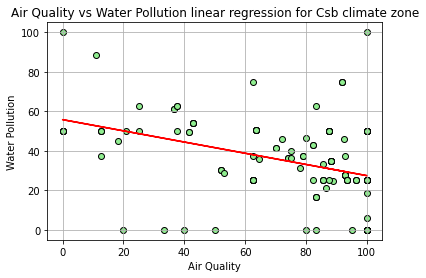

In [15]:
#Chart plotting
x_values = Csb_airwater_data_df[" \"AirQuality\""]
y_values = Csb_airwater_data_df[" \"WaterPollution\""]

regEQplotX = -25
regEQplotY = 40

y_label = "Water Pollution"
plt.title(f'Air Quality vs Water Pollution linear regression for Csb climate zone')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'./Water_Air_Data/Air Quality vs Water Pollution Linear Regression for Csb climate zone.png')
plt.show()

#There is correlation between air quality and water pollution for the Csb region.
#For EF there was no correlation probably because the data set was too small

In [74]:
# using groupby function # with one key


bycountry_air_df = airwater_data_df.groupby("country")
bycountry_air_df.groups


{'Afghanistan': [1033, 1208, 1242], 'Albania': [1765, 1766], 'Algeria': [806, 1238, 1313, 1411], 'Angola': [466], 'Argentina': [28, 31, 50, 67, 69, 70, 71, 88, 89, 90, 134, 141, 142, 150, 160, 164, 201, 202, 231, 236, 240, 241, 248, 259, 260, 280, 317, 347, 485], 'Australia': [4, 5, 6, 7, 8, 25, 48, 49, 84, 85, 106, 111, 124, 138, 139, 140, 147, 148, 152, 153, 186, 187, 188, 219, 220, 232, 233, 239, 255, 272, 273, 276, 277, 278, 282, 283, 284, 300, 301, 327, 328, 329, 346, 362, 375, 385, 400, 417, 429, 986, 987, 1308, 1309, 1828, 1935, 2028, 2029], 'Austria': [2049, 2050], 'Bahamas': [802, 827], 'Bangladesh': [745, 763, 771, 772, 815], 'Barbados': [1967], 'Belarus': [2132, 2133, 2136, 2146, 2161], 'Belgium': [1494, 1495, 2101], 'Belize': [430, 684], 'Benin': [568], 'Bermuda': [112, 113, 114], 'Bolivia': [165, 207, 423], 'Bosnia and Herzegovina': [1891, 1970, 1971], 'Brazil': [72, 73, 74, 154, 197, 224, 225, 265, 267, 303, 304, 313, 323, 326, 333, 342, 348, 354, 355, 356, 357, 358, 359,

In [75]:
avg_bycountry_air_df = bycountry_air_df.aggregate(np.mean)
avg_bycountry_air_df

,geonameid,"""AirQuality""","""WaterPollution"""
country,,,
Afghanistan,1.140416e+06,54.057018,37.436869
Albania,3.184802e+06,27.908416,67.838542
Algeria,2.495848e+06,45.352564,50.564601
Angola,2.240449e+06,15.000000,81.250000
Argentina,3.771296e+06,66.116972,42.001229
...,...,...,...
Venezuela,3.637657e+06,42.742755,64.832374
Vietnam,1.574075e+06,38.047393,62.214804
Yemen,2.448330e+05,58.333333,75.000000


In [76]:
avg_bycountry_air_df = avg_bycountry_air_df.sort_values(by=[" \"AirQuality\""])
avg_bycountry_air_df 

,geonameid,"""AirQuality""","""WaterPollution"""
country,,,
Hungary,3.042638e+06,0.000000,100.000000
Central African Republic,2.389853e+06,0.000000,100.000000
Turkmenistan,1.620990e+05,0.000000,50.000000
China,1.833530e+06,10.499182,54.526737
Madagascar,1.061275e+06,12.500000,75.000000
...,...,...,...
Iceland,3.154105e+06,90.561594,43.371212
Sierra Leone,2.403094e+06,92.361111,42.361111
Swaziland,9.349850e+05,93.750000,31.250000


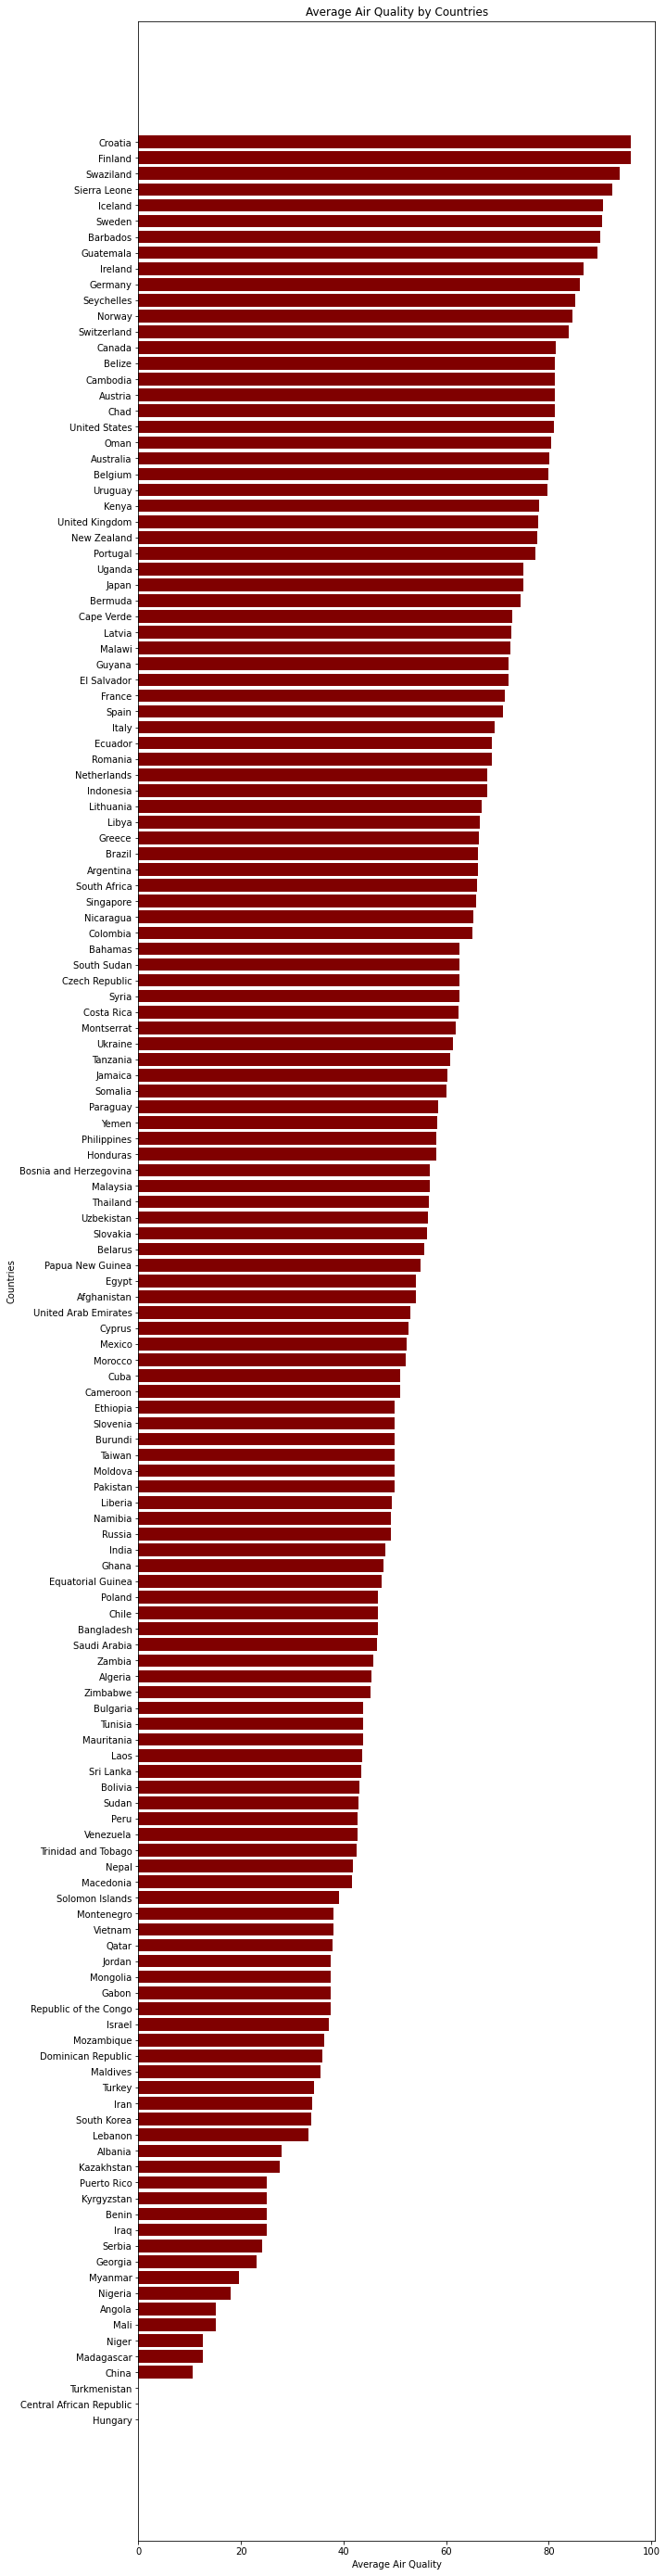

In [78]:
airquality = avg_bycountry_air_df[" \"AirQuality\""]

fig = plt.figure(figsize=(10, 50))
  
# creating the bar plot
plt.barh(airquality.keys(), airquality, color='maroon')
  
plt.xlabel("Average Air Quality")
plt.ylabel("Countries")
plt.title("Average Air Quality by Countries")
plt.savefig(f'./Water_Air_Data/Air Quality by Country.png')

plt.show()
